In [11]:
! pip install -q scienceplots

In [124]:
from collections import namedtuple

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scienceplots 

In [125]:
matplotlib.use("pgf")

plt.style.reload_library()
plt.style.use(['science'])
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage[T1]{fontenc} \usepackage{newtxtext,newtxmath}'
# matplotlib.rcParams['text.latex.unicode'] = True 
matplotlib.rcParams['text.usetex'] = True 

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['savefig.dpi'] = 200

In [126]:
%matplotlib inline

### Load Survey Data

In [29]:
# Load the survey responses from the provided CSV file
file_path = "results-survey231976-2.csv"
survey_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
survey_data.head()

,id. Response ID,submitdate. Date submitted,startdate. Date started,G1Q00001. Your current study program?,G1Q00001[other]. Your current study program? [Other],G1Q00002. Bachelor or Master?,"G1Q00003. In which semester were you in SS24?(If you are a master student, only count your master semesters and do not count your bachelor semesters)",G1Q00004. Which OS (operating system) do you use on your laptop?,G1Q00005. Which internet browser do you usually use?,G1Q00006. How would you describe your programming experience?,...,G4Q00005. I feel that having access to direct automated feedback from Artemis continously helps me more than arranging a meetings with a human tutor.,G5Q00001. It is easy to receive direct automated feedback from Artemis on my programming assignments.,G5Q00002. I would rather use the direct automated feedback integrated into Artemis than use an external AI tool for getting feedback.,G5Q00003. I find the direct automated feedback from Artemis helpful in improving my programming skills.,G5Q00004. I am satisfied with the overall performance of the direct automated feedback.,G5Q00005. Are there any improvements that you would suggest for direct automated feedback?,G5Q00006. How did you find the feedback?,G5Q00007. What kind of feedback would you like to receive?,G5Q00008. Was there anything you particularly liked about the direct automated feedback process?,G5Q00009. What difficulties did you encounter when using the direct automated feedback process?
0,1,2024-06-10 12:25:13,2024-06-10 12:20:28,Informatics,NaN,Bachelor,6,MacOS,Safari,Advanced,...,Neutral,Strongly Agree,Strongly Agree,Agree,Agree,"- Some kind of ordering by ""category"" or impor...",NaN,NaN,NaN,NaN
1,2,2024-06-10 12:38:12,2024-06-10 12:33:52,Information Systems,NaN,Bachelor,8,MacOS,Opera,Advanced,...,Agree,Agree,Disagree,Agree,Disagree,the feedback was not provided in a structured ...,NaN,NaN,NaN,NaN
2,3,2024-06-10 12:51:07,2024-06-10 12:41:27,Informatics,NaN,Master,6,MacOS,Arc,Intermediate,...,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,It's hard to distinguish which feedbacks are m...,NaN,NaN,NaN,NaN
3,4,2024-06-10 13:07:20,2024-06-10 13:02:22,Information Systems,NaN,Bachelor,10,MacOS,Arc,Intermediate,...,Agree,Strongly Agree,Neutral,Agree,Agree,NaN,NaN,NaN,NaN,NaN
4,5,2024-06-13 12:40:06,2024-06-13 12:29:42,Informatics,NaN,Master,3,MacOS,Google Chrome,Expert,...,Strongly Agree,Agree,Agree,Agree,Strongly Agree,"Better UX when asking for feedback, so that I ...","Quite relevant, it helped me fix some obvious ...","Mostly about my mistakes, point out where and ...","The fact that with this tool, I wouldn't have ...",It is nice that it tells you that you did a go...


In [30]:
survey_data.columns

Index(['id. Response ID', 'submitdate. Date submitted',
       'startdate. Date started', 'G1Q00001. Your current study program?',
       'G1Q00001[other]. Your current study program? [Other]',
       'G1Q00002. Bachelor or Master? ',
       'G1Q00003. In which semester were you in SS24?(If you are a master student, only count your master semesters and do not count your bachelor semesters) ',
       'G1Q00004. Which OS (operating system) do you use on your laptop?',
       'G1Q00005. Which internet browser do you usually use?',
       'G1Q00006. How would you describe your programming experience?',
       'G2Q00001. The direct automated feedback from Artemis keeps me more engaged in the learning process.',
       'G2Q00002. The direct automatic feedback from Artemis motivates me to repeatedly improve my code. ',
       'G2Q00003. The direct automated feedback from Artemis makes me feel more motivated to complete my programming assignments. ',
       'G2Q00004. The direct automated feed

### Likert Scale Figure

In [31]:
Question = namedtuple('Question', ['paper_key', 'text', 'summary'])

likert_questions = [
    Question('Q1', 'The direct automated feedback from Artemis keeps me more engaged in the learning process.', 'Engagement'),
    Question('Q2', 'The direct automatic feedback from Artemis motivates me to repeatedly improve my code.', 'Improvement Motivation'),
    Question('Q3', 'The direct automated feedback from Artemis makes me feel more motivated to complete my programming assignments.', 'Completion Motivation'),
    Question('Q4', 'The direct automated feedback from Artemis encourages me to experiment more with my coding solutions.', 'Encourages Experimentation'),
    Question('Q5', 'I feel more comfortable requesting direct automated feedback from Artemis than feedback from a human tutor.', 'Comfort'),
    Question('Q6', 'I am likely to request feedback more frequently when using direct automated feedback from Artemis than feedback from my course professor.', 'Frequency'),
    Question('Q7', 'I find receiving direct automated feedback from Artemis less intimidating than receiving feedback from a human tutor.', 'Less Intimidation'),
    Question('Q8', 'I feel that requesting direct automated feedback from Artemis is more convenient than arranging a meeting with a human tutor.', 'Convenience'),
    Question('Q9', 'The direct automated feedback provided by Artemis helps me understand my mistakes.', 'Understanding Mistakes'),
    Question('Q10', 'The direct automated feedback from Artemis is more effective than one-time feedback.', 'Effectiveness'),
    Question('Q11', 'The direct automated feedback has significantly improved the quality of my programming assignment.', 'Quality Improvement'),
    Question('Q12', 'The direct automated feedback is a helpful addition to the automatic test case results.', 'Addition to Test Cases'),
    Question('Q13', 'I feel that having access to direct automated feedback from Artemis continously helps me more than arranging a meetings with a human tutor.', 'Continuous Help'),
    Question('Q14', 'It is easy to receive direct automated feedback from Artemis on my programming assignments.', 'Ease of Use'),
    Question('Q15', 'I would rather use the direct automated feedback integrated into Artemis than use an external AI tool for getting feedback.', 'Preference'),
    Question('Q16', 'I find the direct automated feedback from Artemis helpful in improving my programming skills.', 'Skill Improvement'),
    Question('Q17', 'I am satisfied with the overall performance of the direct automated feedback.', 'Overall Satisfaction')
]

likert_columns = []
for question in likert_questions:
    for column in survey_data.columns:
        if question.text in column.replace(u'\xa0', u' '):
            likert_columns.append(column)
            break
    else:
        print(f"Warning: No column found for question '{question.text}'")

likert_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

likert_responses = survey_data[likert_columns]
likert_responses_numeric = likert_responses.map(lambda x: likert_mapping.get(x, 0))

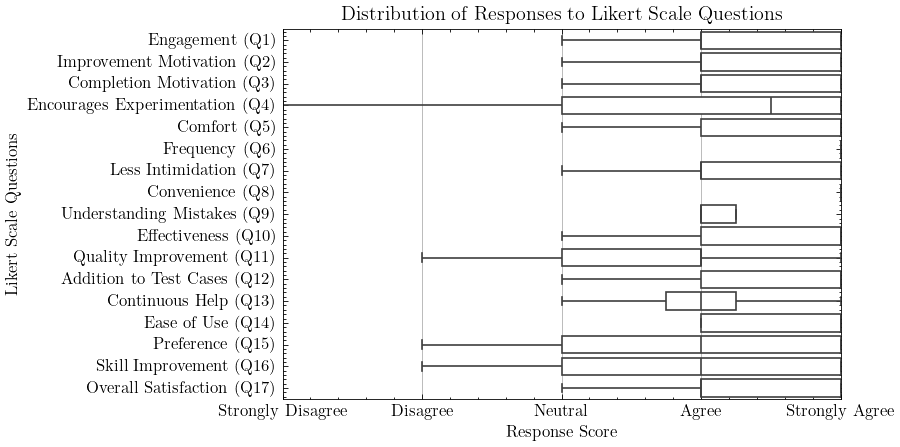

In [74]:
y_labels = [f'{question.summary} ({question.paper_key})' for question in likert_questions]

plt.figure(figsize=(6, 4))
sns.boxplot(data=likert_responses_numeric, orient='h', color='white', fliersize=0)
plt.title('Distribution of Responses to Likert Scale Questions')
plt.yticks(ticks=range(len(likert_questions)), labels=y_labels)
plt.xlabel('Response Score')
plt.ylabel('Likert Scale Questions')
ax = plt.gca()
for lab in ax.yaxis.get_ticklabels():
    lab.set_verticalalignment("center")
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'])
plt.xlim(1, 5)
plt.grid(True, axis='x')

plt.savefig('../figures/likert_responses.pgf', bbox_inches='tight')

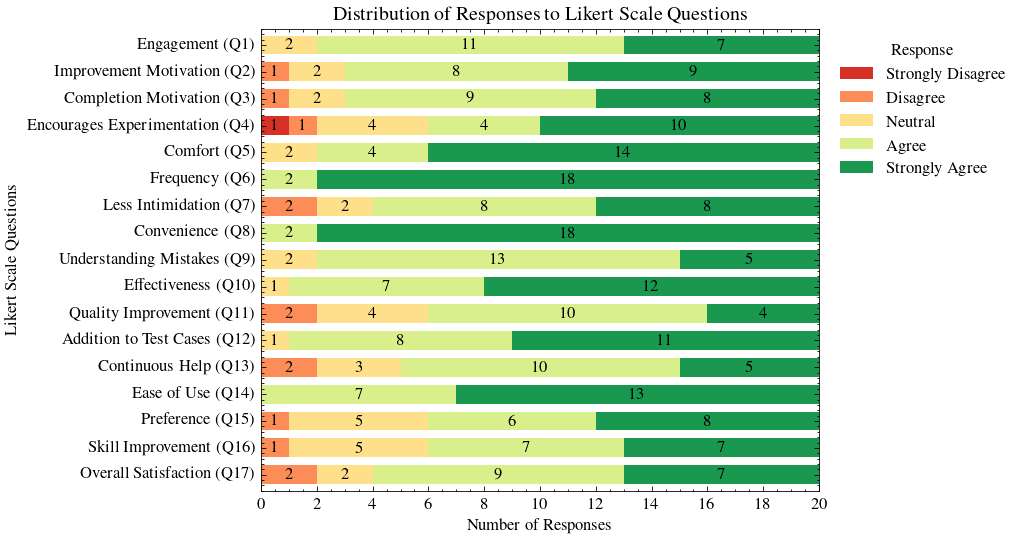

In [177]:
likert_counts = likert_responses.apply(lambda x: x.value_counts()).fillna(0).transpose()
likert_counts = likert_counts[['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']]

fig, ax = plt.subplots(figsize=(6, 5))

likert_counts.plot(kind='barh', stacked=True, ax=ax, color=['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#1a9850'], width=0.7)

# Adding percentage labels to the bars
for container in ax.containers:
    labels = [int(v) if v > 0 else "" for v in container.datavalues]    
    ax.bar_label(container, labels=labels, fmt='%.0f', label_type='center')

ax.set_title('Distribution of Responses to Likert Scale Questions')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Likert Scale Questions')
ax.set_yticks(range(len(y_labels)))
ax.set_xlim(0, len(likert_responses))
ax.set_yticklabels(y_labels)
ax.invert_yaxis()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Fix y axis alignment
ax = plt.gca()
for lab in ax.yaxis.get_ticklabels():
    lab.set_verticalalignment("center")

plt.legend(title='Response', bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.legend(title='Response', bbox_to_anchor=(0.3, -0.1), loc='upper center', ncol=5, frameon=False)
plt.savefig('../figures/likert_responses_stacked.pgf', bbox_inches='tight')
plt.show()

# replace \mathdefault with '' in the pgf file to fix latex error
with open('../figures/likert_responses_stacked.pgf', 'r') as file:
    filedata = file.read()
    filedata = filedata.replace('\\mathdefault', '')
with open('../figures/likert_responses_stacked.pgf', 'w') as file:
    file.write(filedata)

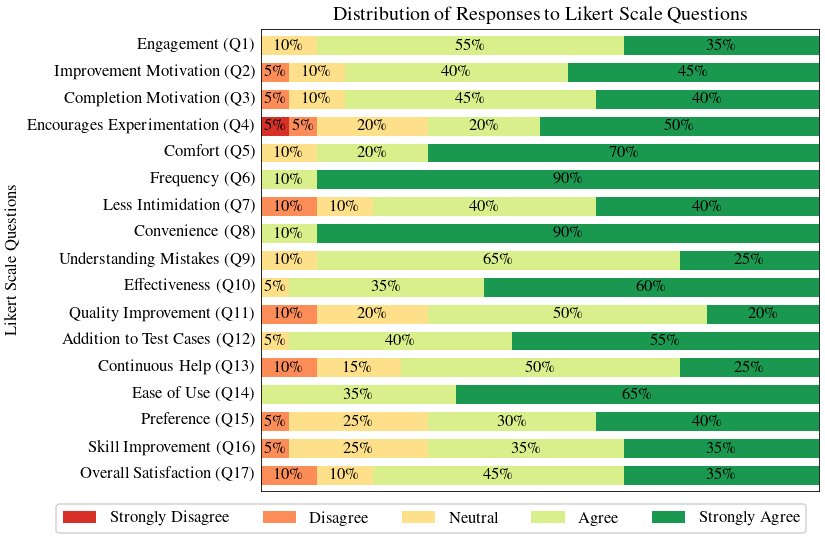

In [180]:
likert_counts = likert_responses.apply(lambda x: x.value_counts()).fillna(0).transpose()
likert_counts = likert_counts[['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']]

fig, ax = plt.subplots(figsize=(6, 5))

likert_counts_percent = likert_counts.div(likert_counts.sum(axis=1), axis=0) * 100
likert_counts_percent.plot(kind='barh', stacked=True, ax=ax, color=['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#1a9850'], width=0.7)

# Adding percentage labels to the bars
for container in ax.containers:
    labels = [f'{int(v)}\%' if v > 0 else "" for v in container.datavalues]    
    # ax.bar_label(container, labels=labels, fmt='%.0f%%', label_type='center')
    ax.bar_label(container, labels=labels, label_type='center')

ax.set_title('Distribution of Responses to Likert Scale Questions')
ax.set_xlabel('Percentage of Responses')
ax.set_ylabel('Likert Scale Questions')
ax.set_yticks(range(len(y_labels)))
ax.set_xlim(0, 100)
ax.set_yticklabels(y_labels)
ax.invert_yaxis()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Hide x axis labels
ax.xaxis.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

# Fix y axis alignment
ax = plt.gca()
for lab in ax.yaxis.get_ticklabels():
    lab.set_verticalalignment("center")

# plt.legend(title='Response', bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.legend(title='Response', bbox_to_anchor=(0.3, -0.1), loc='upper center', ncol=5, frameon=False)
# plt.legend(bbox_to_anchor=(0.33, 1.075), loc='lower center', ncol=5, frameon=True)
plt.legend(bbox_to_anchor=(0.305, -0.01), loc='upper center', ncol=5, frameon=True)
plt.savefig('../figures/likert_responses_stacked_percentage.pgf', bbox_inches='tight')
plt.show()

# replace \mathdefault with '' in the pgf file to fix latex error
with open('../figures/likert_responses_stacked_percentage.pgf', 'r') as file:
    filedata = file.read()
    filedata = filedata.replace('\\mathdefault', '')
with open('../figures/likert_responses_stacked_percentage.pgf', 'w') as file:
    file.write(filedata)